 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_single_family_percent.pkl', 'rb') as fp:
    single_family_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_single_family_price.pkl', 'rb') as fp:
    single_family_price = pickle.load(fp)

In [4]:
single_family_percent.head(5)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
02/2000,0.433300,0.431640,0.385379,0.434993,0.427653,0.452167,0.365024,0.405608,0.431607,0.375843,...,-0.465295,0.127847,0.376355,0.309478,0.440812,0.406021,0.015479,0.014994,0.193816,0.250569
03/2000,0.557826,0.494564,0.461205,0.557183,0.550032,0.459477,0.503188,0.508890,0.536250,0.461783,...,-0.312655,0.439637,0.617454,0.154064,0.313234,0.186883,0.469673,1.632973,1.080329,-0.040349
04/2000,1.002204,0.902033,0.852741,0.984234,0.917037,0.933355,0.869516,1.362105,0.947764,0.912287,...,-2.249440,0.899983,0.409680,0.535823,0.917578,0.881134,0.577510,1.343485,1.089487,-0.874031
05/2000,0.988941,0.939425,0.934807,1.046481,0.958974,1.005369,0.902859,1.121907,0.998124,1.054185,...,-1.315683,0.897683,0.700253,0.591574,1.070685,1.365311,0.439163,1.981794,1.217791,-0.667383
06/2000,0.872458,0.832096,0.807874,0.893452,0.714429,0.967227,0.561651,0.508236,0.884972,1.019365,...,-2.029394,0.571137,-0.316135,0.701882,0.779542,2.259438,0.106121,0.621411,-0.115392,-0.621192


In [5]:
single_family_price.head()

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
01/2000,118163.0,239783.0,189424.0,173336.0,179585.0,127829.0,156428.0,196495.0,158941.0,155118.0,...,166131.0,137665.0,173772.0,251714.0,284475.0,217969.0,316554.0,173400.0,176456.0,177995.0
02/2000,118675.0,240818.0,190154.0,174090.0,180353.0,128407.0,156999.0,197292.0,159627.0,155701.0,...,165358.0,137841.0,174426.0,252493.0,285729.0,218854.0,316603.0,173426.0,176798.0,178441.0
03/2000,119337.0,242009.0,191031.0,175060.0,181345.0,128997.0,157789.0,198296.0,160483.0,156420.0,...,164841.0,138447.0,175503.0,252882.0,286624.0,219263.0,318090.0,176258.0,178708.0,178369.0
04/2000,120533.0,244192.0,192660.0,176783.0,183008.0,130201.0,159161.0,200997.0,162004.0,157847.0,...,161133.0,139693.0,176222.0,254237.0,289254.0,221195.0,319927.0,178626.0,180655.0,176810.0
05/2000,121725.0,246486.0,194461.0,178633.0,184763.0,131510.0,160598.0,203252.0,163621.0,159511.0,...,159013.0,140947.0,177456.0,255741.0,292351.0,224215.0,321332.0,182166.0,182855.0,175630.0


  train test split

In [6]:
trdf_percent = single_family_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = single_family_price.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [8]:
single_family_percent.head(3)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
02/2000,0.433300,0.431640,0.385379,0.434993,0.427653,0.452167,0.365024,0.405608,0.431607,0.375843,...,-0.465295,0.127847,0.376355,0.309478,0.440812,0.406021,0.015479,0.014994,0.193816,0.250569
03/2000,0.557826,0.494564,0.461205,0.557183,0.550032,0.459477,0.503188,0.508890,0.536250,0.461783,...,-0.312655,0.439637,0.617454,0.154064,0.313234,0.186883,0.469673,1.632973,1.080329,-0.040349
04/2000,1.002204,0.902033,0.852741,0.984234,0.917037,0.933355,0.869516,1.362105,0.947764,0.912287,...,-2.249440,0.899983,0.409680,0.535823,0.917578,0.881134,0.577510,1.343485,1.089487,-0.874031


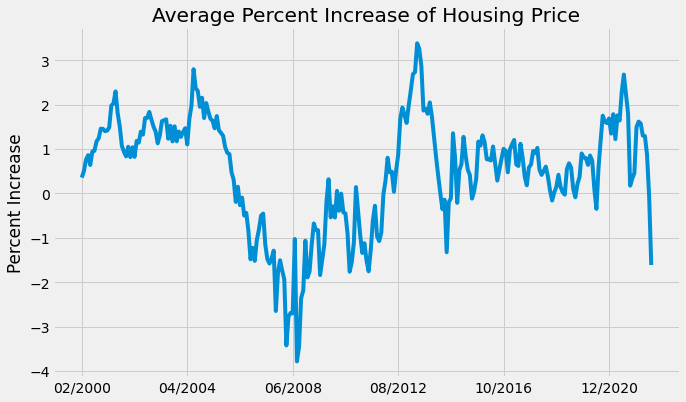

In [9]:
mean = np.mean(single_family_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of Housing Price')
plt.show()

Average Housing Price

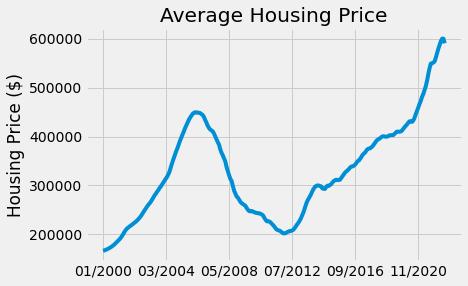

In [10]:
price_mean = np.mean(single_family_price, axis = 1)
ax = price_mean.plot(figsize = (6, 4))
plt.ylabel('Housing Price ($)')
plt.title('Average Housing Price')
plt.show()

 Percent Increase All Zip Codes

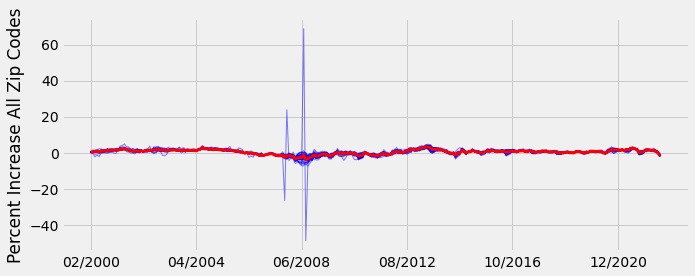

In [11]:
single_family_percent.plot(figsize = (10, 4), lw = 1, color = 'blue', alpha = 0.5)
mean.plot(c = 'red', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [12]:
single_family_price.head(3)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
01/2000,118163.0,239783.0,189424.0,173336.0,179585.0,127829.0,156428.0,196495.0,158941.0,155118.0,...,166131.0,137665.0,173772.0,251714.0,284475.0,217969.0,316554.0,173400.0,176456.0,177995.0
02/2000,118675.0,240818.0,190154.0,174090.0,180353.0,128407.0,156999.0,197292.0,159627.0,155701.0,...,165358.0,137841.0,174426.0,252493.0,285729.0,218854.0,316603.0,173426.0,176798.0,178441.0
03/2000,119337.0,242009.0,191031.0,175060.0,181345.0,128997.0,157789.0,198296.0,160483.0,156420.0,...,164841.0,138447.0,175503.0,252882.0,286624.0,219263.0,318090.0,176258.0,178708.0,178369.0


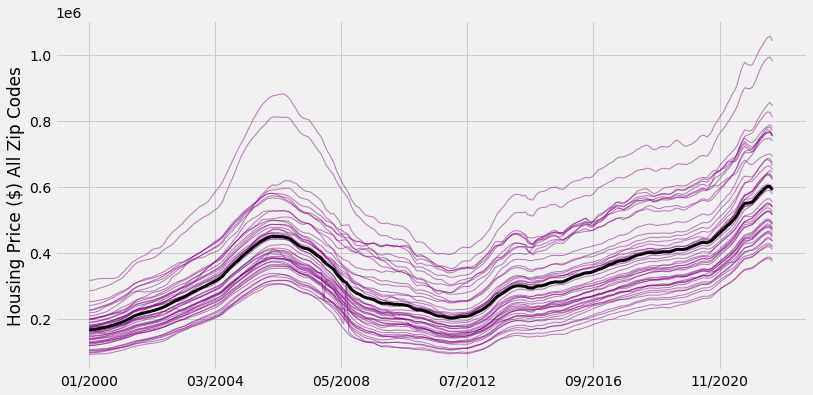

In [13]:
single_family_price.plot(figsize = (12, 6), lw = 1, color = 'purple', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Housing Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [14]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [15]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95823, 95630, 95834, 95815, 95829]


 zip closest to average

In [16]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95632
